## Importing Packages

In [1]:
import pandas as pd 
import numpy as np

import dabl

#misc
import gc
import time
import warnings

warnings.simplefilter("ignore")

#viz
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import plotly.express as px

#FeatureEngineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
#from sklearn.base import BaseEstimator, ClassifierMixin
#from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import log_loss
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV

#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')

from textblob import Word

#settings
start_time=time.time()
color = sns.color_palette()
sns.set_style("dark")
eng_stopwords = set(stopwords.words("english"))
warnings.filterwarnings("ignore")

lem = WordNetLemmatizer()
tokenizer=TweetTokenizer()

%matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import os

os.getcwd()

'g:\\FullStack AI\\Machine Learning Projects\\NLP\\15. Capstone Case Study - NLP- Woman Clothing E-Commerce Platform (1)\\CapstoneProject'

#### Reading the Data

In [3]:
data = pd.read_excel('Womens Clothing Reviews Data.xlsx')


In [4]:
data.head(3)

Product ID   Category Subcategory1 SubCategory2   Location Channel  \
0         767  Initmates     Intimate    Intimates     Mumbai  Mobile   
1        1080    General      Dresses      Dresses  Bangalore  Mobile   
2        1077    General      Dresses      Dresses    Gurgaon  Mobile   

   Customer Age             Review Title  \
0            33                      NaN   
1            34                      NaN   
2            60  Some major design flaws   

                                         Review Text  Rating  Recommend Flag  
0  Absolutely wonderful - silky and sexy and comf...       4               1  
1  Love this dress!  it's sooo pretty.  i happene...       5               1  
2  I had such high hopes for this dress and reall...       3               0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


#### Re-naming Variables

In [6]:
data.rename(columns={'SubCategory2':'Subcategory2', 'Customer Age':'Customer_Age',"Review Text":"Review_Text","Recommend Flag":'Recommend_Flag',"Review Title":'Review_Title' },inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   Subcategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer_Age    23486 non-null  int64 
 7   Review_Title    19676 non-null  object
 8   Review_Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend_Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


#### Handling Missing Values 

In [8]:
(data.isna().sum()/data.shape[0] )*100

Product ID         0.000000
Category           0.059610
Subcategory1       0.059610
Subcategory2       0.059610
Location           0.000000
Channel            0.000000
Customer_Age       0.000000
Review_Title      16.222430
Review_Text        3.597888
Rating             0.000000
Recommend_Flag     0.000000
dtype: float64

In [9]:
### Removing unwanted column

df= data.drop(columns=["Review_Title","Product ID"])

In [10]:
(df.isna().sum()/data.shape[0] )*100

Category          0.059610
Subcategory1      0.059610
Subcategory2      0.059610
Location          0.000000
Channel           0.000000
Customer_Age      0.000000
Review_Text       3.597888
Rating            0.000000
Recommend_Flag    0.000000
dtype: float64

In [11]:
df= df[df.Review_Text.notna()]


In [12]:
(df.isna().sum()/data.shape[0] )*100

Category          0.055352
Subcategory1      0.055352
Subcategory2      0.055352
Location          0.000000
Channel           0.000000
Customer_Age      0.000000
Review_Text       0.000000
Rating            0.000000
Recommend_Flag    0.000000
dtype: float64

In [13]:
df=df.dropna()

In [14]:
(df.isna().sum()/data.shape[0] )*100

Category          0.0
Subcategory1      0.0
Subcategory2      0.0
Location          0.0
Channel           0.0
Customer_Age      0.0
Review_Text       0.0
Rating            0.0
Recommend_Flag    0.0
dtype: float64

In [15]:
data.shape

(23486, 11)

In [16]:
df.shape

(22628, 9)

## EDA 

## Analysing Each variable against Target Variable

### Target Variable:  Recommended Flag

In [17]:
px.histogram(data_frame=df,x='Recommend_Flag')

In [319]:
(df.Recommend_Flag.value_counts()/df.shape[0])*100

1    81.876436
0    18.123564
Name: Recommend_Flag, dtype: float64

<font color="Orange"> **Observation** </font>: We have imbalanced Target with almost 82% of the data as has 1 and 18 % of the data has 0


#### Analysing Product Category and Sub Category

In [307]:
#plt.title("Category of Clothes")
px.histogram( data_frame=df,x='Category',color = 'Recommend_Flag',title="Category Stacked with Recommendations")
#plt.show()

In [308]:

px.histogram( data_frame=df,x='Subcategory1',color = 'Recommend_Flag',title="SubCategory-1  Stacked with Recommendations")

In [309]:
px.histogram( data_frame=df,x='Subcategory2',color = 'Recommend_Flag', title="SubCategory-2 Stacked with Recommendations")

<font color="Orange"> **Observation** </font>:
1) The Recommendations Flag is evenly distibuted according to the number of records in each category
2) Sub Category 2 has more categories so will be dropping
3) Tops is the most reviewed Dress

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        22628 non-null  object
 1   Subcategory1    22628 non-null  object
 2   Subcategory2    22628 non-null  object
 3   Location        22628 non-null  object
 4   Channel         22628 non-null  object
 5   Customer_Age    22628 non-null  int64 
 6   Review_Text     22628 non-null  object
 7   Rating          22628 non-null  int64 
 8   Recommend_Flag  22628 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [321]:
df.Location.value_counts()

px.histogram(data_frame=df, x='Location',color = 'Recommend_Flag', title= "Location and Recommendations Intuition")

In [322]:

px.histogram(data_frame=df, x='Channel',color = 'Recommend_Flag', title= "Payement Channel and Recommendations Intuition")

<font color="Orange"> **Observation** </font>:
1) Gurgaon has more customers.
2) People have reviewed more using web channels.
3) Will be dropping these two variables has they dont give more information. (No variance)

In [311]:
px.histogram(data_frame=df, x='Customer_Age',color = 'Recommend_Flag', title= "Age and Recommendations Intuition")


In [25]:
df.Customer_Age.describe()

count    22628.000000
mean        43.282880
std         12.328176
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Customer_Age, dtype: float64

#### Rating

In [26]:
df.Rating.describe()

count    22628.000000
mean         4.183092
std          1.115911
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [27]:
px.histogram(data_frame=df,x='Rating',color = 'Recommend_Flag')

<font color="Orange"> **Observation** </font>:
    1)  Highly Rated Products are recommended 
    2)  Low rated products are not recommended

In [28]:
# age vs reccomendation
px.box(data_frame=df, y='Customer_Age', x='Recommend_Flag', color='Recommend_Flag')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        22628 non-null  object
 1   Subcategory1    22628 non-null  object
 2   Subcategory2    22628 non-null  object
 3   Location        22628 non-null  object
 4   Channel         22628 non-null  object
 5   Customer_Age    22628 non-null  int64 
 6   Review_Text     22628 non-null  object
 7   Rating          22628 non-null  int64 
 8   Recommend_Flag  22628 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.7+ MB


In [313]:

# age vs rating

px.box(data_frame=df, y='Customer_Age', x='Rating', color='Recommend_Flag',title="Customer_Age Vs Rating")

In [34]:
px.histogram(data_frame=df, y='Subcategory2', x='Rating', color='Recommend_Flag')

In [38]:
tf=pd.DataFrame()

In [39]:
tf['Review_Text']= df.Review_Text

# Analysing Reviews- Text Data EDA

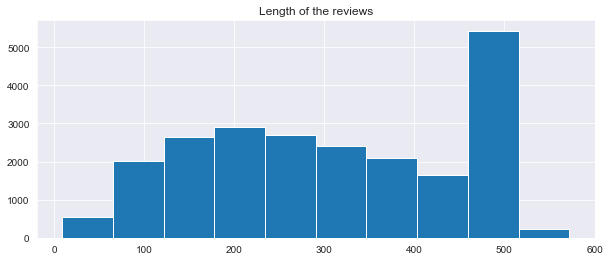

In [55]:
plt.figure(figsize=(10,4))
tf['Review_Text'].str.len().hist()
plt.title("Length of the reviews")
plt.show()

<font color="Orange"> **Observation** </font>: Length of the reviews range from 0 to 550 word length. It seems most of the reviews have 500 characters

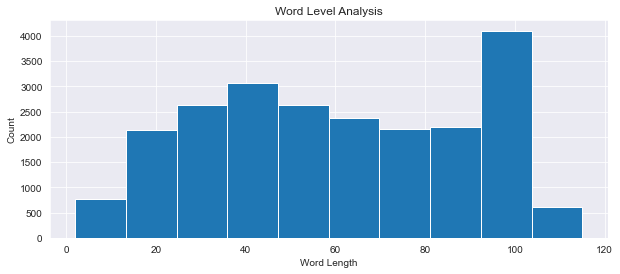

In [57]:
plt.figure(figsize=(10,4))
tf['Review_Text'].str.split().map(lambda x: len(x)).hist()
plt.title("Word Level Analysis")
plt.xlabel("Word Length")
plt.ylabel("Count")
plt.show()

<font color="Orange"> **Observation** </font>: Length of the words range from 10 to 110 word length. Generally the reviews have 100 words

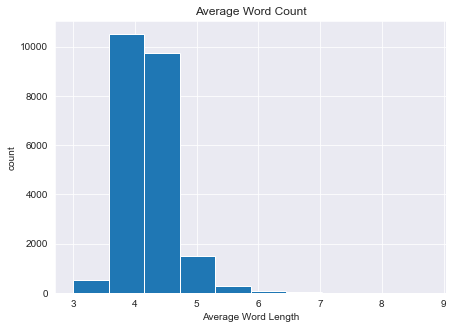

In [58]:
plt.figure(figsize=(7,5))
plt.title("Average Word Count")
plt.xlabel("Average Word Length")
plt.ylabel("count")
tf['Review_Text'].str.split().apply( lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist()
plt.show()

<font color="Orange"> **Observation** </font>: Average length of the words range from 3 to 5

### Constructing Corpus

In [61]:
import nltk

stop=set(stopwords.words('english'))

corpus=[]
new = tf['Review_Text'].str.split()
new =new.values.tolist()
corpus = [word for i in new for word in i]


In [62]:
counts = [1 for i in range(0,len(corpus))]
print(len(corpus))
print(len(counts))

1364046
1364046


In [63]:
dic=dict()
dic =dict(zip(corpus,counts))

In [64]:
# Stopword counts
for word in corpus:
    if word in stop:
        dic[word]+=1

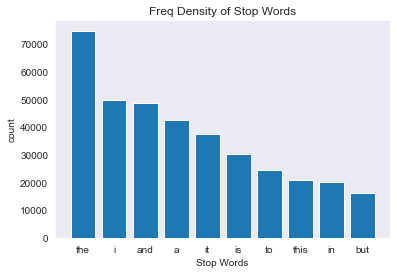

In [65]:
top =sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)
plt.xlabel("Stop Words")
plt.ylabel("count")
plt.title("Freq Density of Stop Words")
plt.show()

In [69]:
from collections import Counter
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
stop.update({'it','all','(which','it\'s',"I",'i\'m','would','This','it.','-','much','got'})

new = tf['Review_Text'].str.split()
new = new.values.tolist()
corpus =[word for i in new for word in i]


counter = Counter(corpus)
most = counter.most_common()
x,y=[],[]

for i,j in most[:80]:
    if i not in stop:
        x.append(i)
        y.append(j)

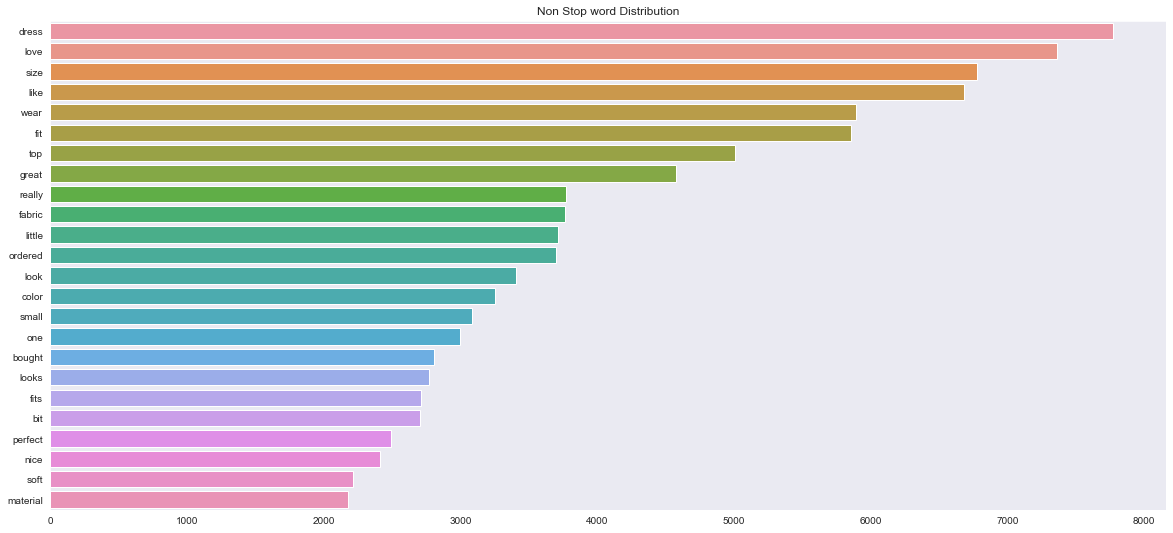

In [72]:
plt.figure(figsize=(20,9))
plt.title("Non Stop word Distribution")
sns.barplot(x=y,y=x)
plt.show()

# Sentiment Analysis of Reviews

#### Calculating Sentiment analysis using Textblob module

In [73]:
tf['sentiment'] = tf["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [74]:
tf['sentiment_cat'] = np.where(tf.sentiment>0.1,'Positive', np.where(tf.sentiment<-0.1,'Negative', 'Nuetral'))

In [75]:
df['Sentiment_Cat'] = tf["sentiment_cat"]
tf.head(3)


Review_Text  sentiment sentiment_cat
0  Absolutely wonderful - silky and sexy and comf...   0.633333      Positive
1  Love this dress!  it's sooo pretty.  i happene...   0.339583      Positive
2  I had such high hopes for this dress and reall...   0.073675       Nuetral

In [76]:
a=tf.sentiment_cat.value_counts()/tf.shape[0]*100
a=a.reset_index()
a

index  sentiment_cat
0  Positive      82.455365
1   Nuetral      15.662012
2  Negative       1.882623

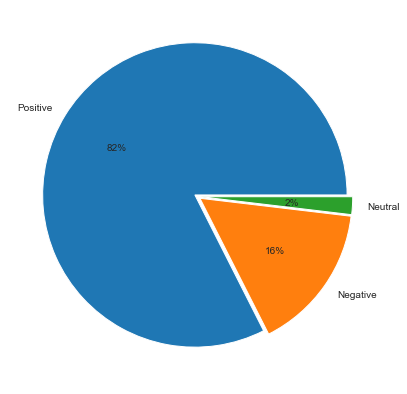

In [77]:
label=['Positive','Negative','Neutral']

explode = [0.02,0.02,0.02]

plt.figure(figsize =(10, 7)) 
plt.pie(a.sentiment_cat, labels=label,autopct='%0.0f%%',explode=explode)
plt.show()

#### <font color="Orange">Observation</font>

1) Most of the reviews are Positive - 82%
2) 16% reviews are Negative while 2% are Nuetral

In [329]:
print("Cross Tab for Rating vs Sentiment")
pd.crosstab(df.Sentiment_Cat, df.Rating)

Cross Tab for Rating vs Sentiment


Rating           1    2     3     4      5
Sentiment_Cat                             
Negative       117  105   101    54     49
Nuetral        324  588   783   836   1013
Positive       380  856  1939  4018  11465

##### Note: even 1 rated proucts have more positive sentiments and 5 rated reviews have some negative sentiments

In [80]:
px.histogram(data_frame=df,x='Rating',color = 'Sentiment_Cat', title ="Impact of Sentiments on Ratings")

##### We can see at 5 rating there are negative sentiments we have to do Topic modelling to get more insights

### Recommendation VS Review Sentiments

In [81]:
## Use Subplots
fig =px.histogram(data_frame=df,x='Recommend_Flag',color= 'Sentiment_Cat',title="Impact of Sentiment on Categories")
fig.show()


#### c. Understand  sentiment  among  the  customers  on  the  different  categories,  sub  categories, products by location and age group

In [82]:

fig =px.histogram(data_frame=df,color='Sentiment_Cat',x= 'Category',title="Impact of Sentiment on Recomendations")
fig.show()

In [83]:
fig =px.histogram(data_frame=df,x='Subcategory1',color= 'Sentiment_Cat',title="Impact of Sentiment on SubCategory1")
fig.show()

In [84]:
fig =px.histogram(data_frame=df,x='Subcategory2',color= 'Sentiment_Cat',title="Impact of Sentiment on Subcategory2")
fig.show()

b. Perform text mining tasks to understand what most frequent words are using for positive 
sentiment and negative sentiment. Create word clouds for the positive & negative reviews 
separately. 


# Text Mining

In [85]:
df.head()

Category Subcategory1 Subcategory2   Location Channel  Customer_Age  \
0       Initmates     Intimate    Intimates     Mumbai  Mobile            33   
1         General      Dresses      Dresses  Bangalore  Mobile            34   
2         General      Dresses      Dresses    Gurgaon  Mobile            60   
3  General Petite      Bottoms        Pants    Chennai     Web            50   
4         General         Tops      Blouses  Bangalore     Web            47   

                                         Review_Text  Rating  Recommend_Flag  \
0  Absolutely wonderful - silky and sexy and comf...       4               1   
1  Love this dress!  it's sooo pretty.  i happene...       5               1   
2  I had such high hopes for this dress and reall...       3               0   
3  I love, love, love this jumpsuit. it's fun, fl...       5               1   
4  This shirt is very flattering to all due to th...       5               1   

  Sentiment_Cat  
0      Positive  
1      Positive  
2       Nuetral  
3      Positive  
4      Positive

# Cleaning and Preprocessing the text Data

In [87]:
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?*&£%€¦_><‘|,'0-9]", "", text)
    #text = text.replace('wat', 'what').replace('txts', 'texts').replace('vry', 'very').replace('gud', 'good').replace('nyt', 'night').replace('msg', 'message')
    return(text)

In [88]:
df['Review_Text']=df['Review_Text'].apply(clean_text)

In [93]:
def pre_process(text):
    text = text.str.replace('/','')                           #Replacing the / with none
    text = text.apply(lambda x: re.sub("  "," ", x))          #Replacing double space with single space
    #text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,']", "", text.str)      #Replacing special character with none
    #text = re.sub(r'[0-9]+', '', text)                        #Replacing numbers with none
    #text = text.apply(lambda x: " ".join(x.translate(str.maketrans('', '', string.punctuation)) for x in x.split() if x.isalpha()))
    text = text.apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #Removing stop words
    #text = text.apply(lambda x: str(TextBlob(x).correct()))                      #Correct spelling corrections
    #text = text.apply(lambda x: " ".join(PorterStemmer().stem(word) for word in x.split())) #Stemming using porter stemmer
    #text = text.apply(lambda x: " ".join(stemmer_func(word) for word in x.split()))        #Stemming
    text = text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))   #lemmatization
    #text = text.apply(lambda x: " ".join(word for word, pos in pos_tag(x.split()) if pos not in ['NN','NNS','NNP','NNPS'])) #Removing nouns etc
    return(text)

In [150]:
df['Review_Text'] = pre_process(df['Review_Text'])

In [151]:
positive_reviews = df[df['Sentiment_Cat']=="Positive"]
negative_reviews = df[df['Sentiment_Cat']=="Negative"]

# Word Cloud for Positive Reviews

In [152]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
previews_count = count_vect.fit_transform(positive_reviews['Review_Text'])


In [153]:
dtm=previews_count.toarray()
dtm1=pd.DataFrame(dtm, columns = count_vect.get_feature_names())

In [154]:
word_freq = pd.DataFrame(dtm1.apply(sum).head(40), columns=['freq'])
word_freq.sort_values('freq', ascending=False, inplace=True)

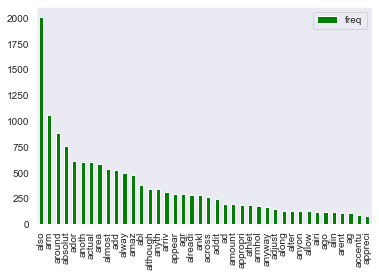

In [155]:
word_freq.plot(kind='bar', color='Green')
plt.show()

In [156]:
word_freq_dictionary = dict(dtm1.apply(sum))

In [157]:
from wordcloud import WordCloud ,STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords=stop)

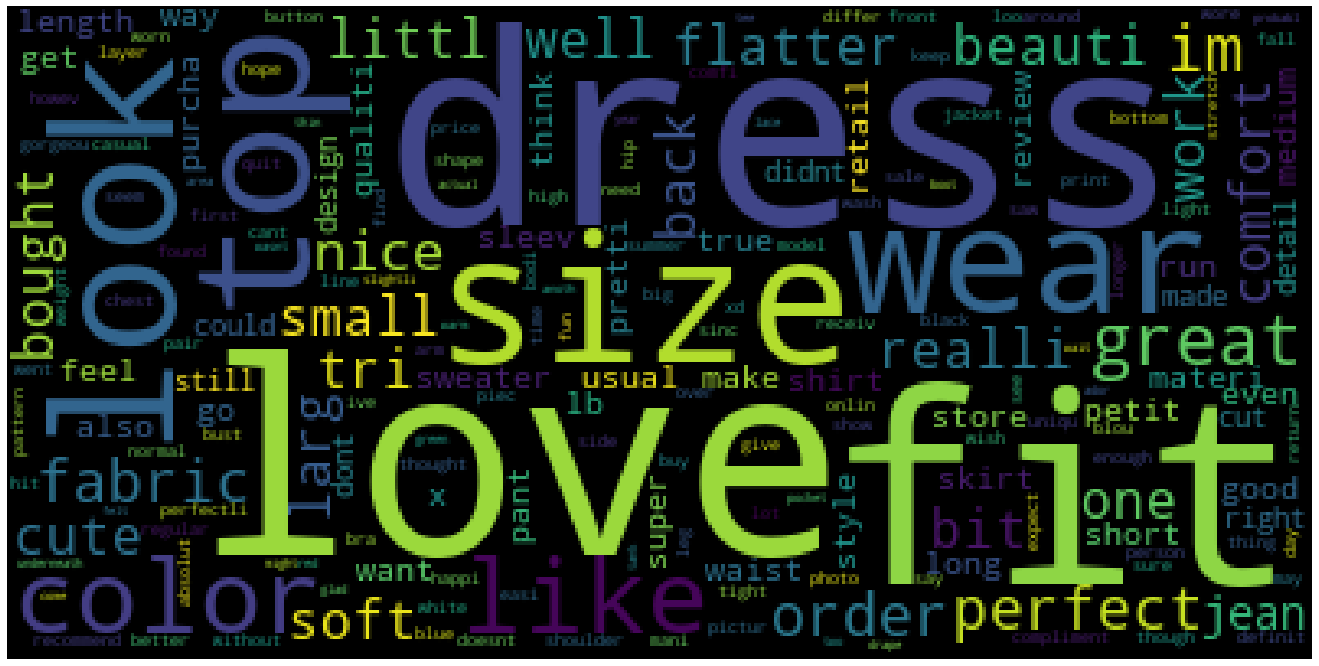

In [158]:
wordcloud = wordcloud.generate_from_frequencies(word_freq_dictionary)

fig = plt.figure(1, figsize=(200, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Word Cloud for Negative Reviews

In [159]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' ,
                             max_features=800)
previews_count = count_vect.fit_transform(negative_reviews['Review_Text'])


In [160]:
n_dtm=previews_count.toarray()
n_dtm1=pd.DataFrame(n_dtm, columns = count_vect.get_feature_names())

In [161]:
n_word_freq = pd.DataFrame(n_dtm1.apply(sum).head(40), columns=['freq'])
n_word_freq.sort_values('freq', ascending=False, inplace=True)

<Figure size 1440x2160 with 0 Axes>

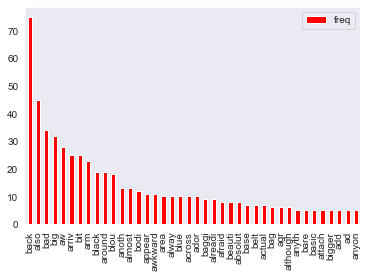

In [162]:
plt.figure(figsize=(20,30))
n_word_freq.plot(kind='bar', color='red')
plt.show()

In [163]:
n_word_freq_dictionary = dict(n_dtm1.apply(sum))

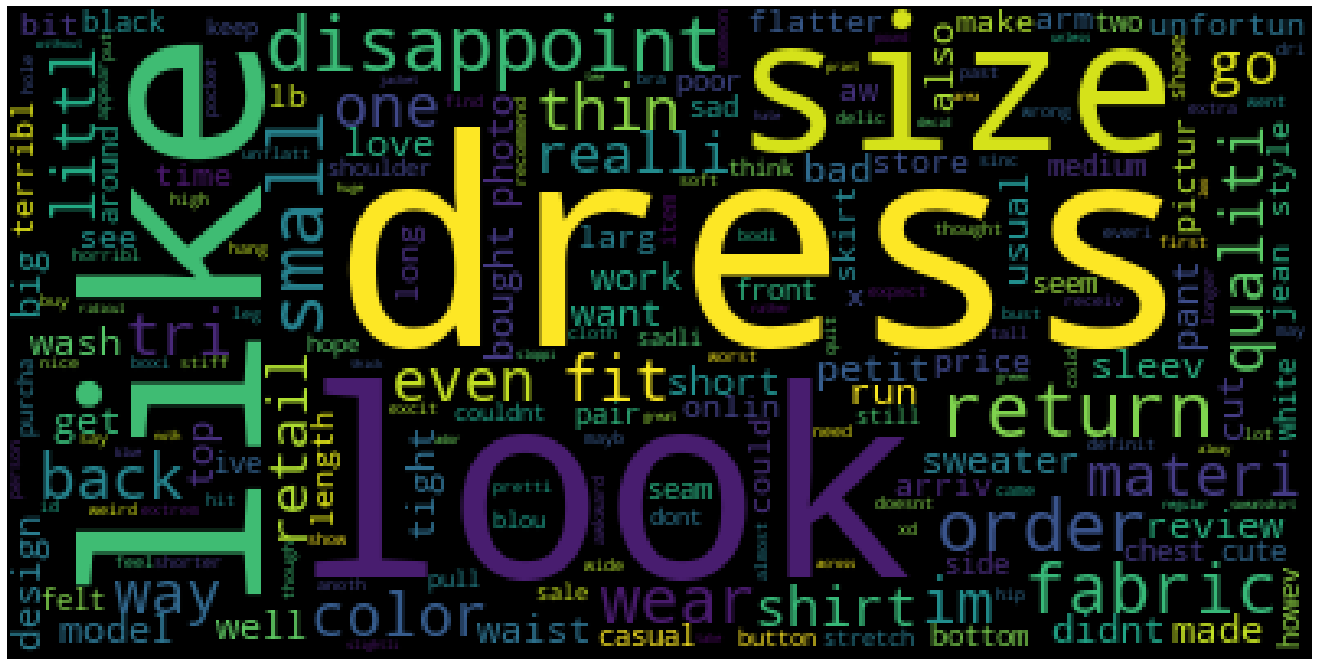

In [164]:
wordcloud = wordcloud.generate_from_frequencies(n_word_freq_dictionary)

fig = plt.figure(1, figsize=(200, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Topic Modelling

##### I am going to do Topic Modelling for positive and negative reviews separately to understand more about that

### <font color= 'Light Blue'>Positive Reviews </font>

In [122]:
tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)

In [165]:
p_tfidf = tfidf_vect.fit_transform(positive_reviews['Review_Text'])

In [166]:
p_dtm_tfidf=pd.DataFrame(p_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [167]:
p_dtm_tfidf.head()

abl   absolut  accentu  accessori  accur  across  actual   ad  add  addit  \
0  0.0  0.390776      0.0        0.0    0.0     0.0     0.0  0.0  0.0    0.0   
1  0.0  0.000000      0.0        0.0    0.0     0.0     0.0  0.0  0.0    0.0   
2  0.0  0.000000      0.0        0.0    0.0     0.0     0.0  0.0  0.0    0.0   
3  0.0  0.000000      0.0        0.0    0.0     0.0     0.0  0.0  0.0    0.0   
4  0.0  0.000000      0.0        0.0    0.0     0.0     0.0  0.0  0.0    0.0   

   ...   xx  xxsp   ye  year  yellow  yesterday  yet  youll  zip  zipper  
0  ...  0.0   0.0  0.0   0.0     0.0        0.0  0.0    0.0  0.0     0.0  
1  ...  0.0   0.0  0.0   0.0     0.0        0.0  0.0    0.0  0.0     0.0  
2  ...  0.0   0.0  0.0   0.0     0.0        0.0  0.0    0.0  0.0     0.0  
3  ...  0.0   0.0  0.0   0.0     0.0        0.0  0.0    0.0  0.0     0.0  
4  ...  0.0   0.0  0.0   0.0     0.0        0.0  0.0    0.0  0.0     0.0  

[5 rows x 1000 columns]

In [168]:
p_lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20)
p_topics = p_lda_model.fit_transform(p_tfidf)
p_topic_word = p_lda_model.components_ 
p_vocab = tfidf_vect.get_feature_names()

In [170]:
topic_word

array([[ 7.15637524, 49.07836383,  0.10000276, ...,  0.10001328,
         0.10000554,  0.10003587],
       [51.15797646, 77.85362404, 28.08311134, ..., 65.40085207,
        48.91503858, 71.05145926],
       [ 0.10000866,  0.10000975,  0.10000224, ...,  0.10001517,
         0.10000364,  0.10001086],
       ...,
       [ 0.10000716,  0.10001311,  0.10000162, ...,  0.10002231,
         0.10000182,  0.10000828],
       [31.36000445, 45.92190324,  0.10000558, ..., 15.67159739,
         6.65633571,  9.0988979 ],
       [ 0.10000668,  0.10000943,  0.10000336, ...,  0.10001   ,
         0.10001071,  0.10002228]])

In [131]:
#vocab

In [171]:
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(p_topic_word):
    topic_words = np.array(p_vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['coat daughter wool simpli old chic oh gift websit boyfriend',
 'suit wash dri clean everyday suggest moss machin shapeless bath',
 'dress top love fit color wear look like size fabric',
 'size dress fit order im small love top petit tri',
 'swingi wow justic remind okay accentu vacat cling cup sleep',
 'love great dress comfort wear fit color jean perfect soft',
 'jumpsuit winter warm cozi season snag loung transit fabul billowi',
 'fit waist look size like love jean pant skirt leg',
 'pilcro everi vest tummi worth let creat thrill shop eleg',
 'dress top return like chest look love size fit beauti']

<font color ='Orange'> Observation </font>
1) Topic 1 is about gift to daughter, boyfriend
2) Topic2 about washing
3) Topic 3 about Fit and fabric
4)Topic 5 about colot and feel
5) Topic 6 Jumpsuit

#### <font color ="Yellow"> Negative Reviews Topics</font>

In [172]:
n_tfidf = tfidf_vect.fit_transform(negative_reviews['Review_Text'])

In [173]:
n_dtm_tfidf=pd.DataFrame(n_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [174]:
n_lda_model = decomposition.LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=20)
n_topics = n_lda_model.fit_transform(n_tfidf)
n_topic_word = n_lda_model.components_ 
n_vocab = tfidf_vect.get_feature_names()

In [175]:
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(n_topic_word):
    topic_words = np.array(n_vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

topic_summaries

['materi soft fabric size petit look realli usual wear tight',
 'sale expen order even size fit work put color tight',
 'pattern red skirt hate howev order design color dress flow',
 'littl short wrong comfi bore top give last dress aw',
 'way money wont pair wear jean sweater pictur size cut',
 'wrong littl spot hem kept hit absolut beauti longer shorter',
 'stripe across dress design seem retail well made beauti wear',
 'green one lace bra slip ridicul hook without get didnt',
 'size small dress return look usual like wear run order',
 'look dress like disappoint materi qualiti thin fabric back color']

Obersvation:
Topics: 

1) About Fit
2) Color
3) Pattern and design
4) wrong sixe
5) Money and cose

# Building a Classification Model

In [179]:
df.head()

Category Subcategory1 Subcategory2   Location Channel  Customer_Age  \
0       Initmates     Intimate    Intimates     Mumbai  Mobile            33   
1         General      Dresses      Dresses  Bangalore  Mobile            34   
2         General      Dresses      Dresses    Gurgaon  Mobile            60   
3  General Petite      Bottoms        Pants    Chennai     Web            50   
4         General         Tops      Blouses  Bangalore     Web            47   

                                         Review_Text  Rating  Recommend_Flag  \
0                  absolut wonder silki sexi comfort       4               1   
1  love dress sooo pretti happen find store im gl...       5               1   
2  high hope dress realli want work initi order p...       3               0   
3  love love love jumpsuit fun flirti fabul everi...       5               1   
4  shirt flatter due adjust front tie perfect len...       5               1   

  Sentiment_Cat  
0      Positive  
1      Positive  
2       Nuetral  
3      Positive  
4      Positive

### Modelling with only Text Reviews

In [180]:
X = df['Review_Text']
y = df.Recommend_Flag

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16971,)
(5657,)
(16971,)
(5657,)


Using both Vecotorizers

In [181]:
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=1000)
X_train_count = count_vect.fit_transform(X_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

#Test
X_test_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_vect.transform(X_test)


In [182]:
dtm_count=pd.DataFrame(X_train_count.toarray(), columns=count_vect.get_feature_names())
dtm_tfidf=pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vect.get_feature_names())

In [254]:
def train_model(classifier, train_set, label, test_set,  y_actual):
    
    classifier.fit(train_set, label)
    predictions = classifier.predict(test_set)
    
    return metrics.accuracy_score(predictions, y_actual)

#### Logistic Regression

In [258]:
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for L1, tfidf Vectors: ", accuracy_L1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_count, y_train, X_test_count, y_test)
print("LR  for L1, WordLevel count: ", accuracy_L1)


LR  for L1, tfidf Vectors:  0.8932296270107831
LR  for L1, WordLevel count:  0.8868658299452007


#### Naive Bayes Classifier

In [259]:
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("Naive Bayes Classifier for L1, TFIDF Vectors: ", accuracy_L1)

accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_count, y_train, X_test_count, y_test)
print("Naive Bayes Classifierfor L1, WordLevel Count: ", accuracy_L1)

Naive Bayes Classifier for L1, TFIDF Vectors:  0.8470920982853102
Naive Bayes Classifierfor L1, WordLevel Count:  0.8836839314124094


#### Linear SVC

In [187]:

# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for L1, Count Vectors: ", accuracy_L1)

# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), X_train_count, y_train, X_test_count, y_test)
print("SVC  for L1, WordLevel TF-IDF: ", accuracy_L1)

SVC  for L1, Count Vectors:  0.888103234930175
SVC  for L1, WordLevel TF-IDF:  0.8838607035531201


## Modelling with All the features

In [224]:
df_final =df.copy()

In [226]:
df_final.drop(columns=['Subcategory2','Channel','Location'],inplace=True)

In [261]:
df_final.head(3)

Customer_Age                                        Review_Text  Rating  \
0            33                  absolut wonder silki sexi comfort       4   
1            34  love dress sooo pretti happen find store im gl...       5   
2            60  high hope dress realli want work initi order p...       3   

   Recommend_Flag  
0               1  
1               1  
2               0

In [228]:
Category= pd.get_dummies(df_final['Category'],drop_first=True).reset_index(drop=True)
Subcategory1= pd.get_dummies(df_final['Subcategory1'],drop_first=True).reset_index(drop=True)
Sentiment_Cat= pd.get_dummies(df_final['Sentiment_Cat'],drop_first=True).reset_index(drop=True)


In [229]:
df_final.drop(columns=['Category','Subcategory1','Sentiment_Cat'],inplace=True)

In [233]:
df_finals= pd.concat([df_final.reset_index(drop=True),Category,Subcategory1,Sentiment_Cat],axis=1)

In [236]:
df_finals.head()
y=df_finals['Recommend_Flag']
X= df_finals[df_finals.columns.difference(['Recommend_Flag'])]

In [240]:
#Splitting Data 
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)

### TFID Vectorizer

In [265]:
vect = TfidfVectorizer(lowercase=True, stop_words='english', max_features=1000, min_df=5, ngram_range=(1, 2))
X_train_tfidf= vect.fit_transform(X_train.Review_Text)
X_test_tfidf = vect.transform(X_test.Review_Text)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

# shape of other four feature columns
X_train.drop('Review_Text', axis=1).shape

(16971, 1000)
(5657, 1000)


(16971, 11)

#### Count Vectorizer

In [266]:

vect = CountVectorizer()
X_train_count = vect.fit_transform(X_train.Review_Text)
X_test_count = vect.transform(X_test.Review_Text)
print(X_train_count.shape)
print(X_test_count.shape)

# shape of other four feature columns
X_train.drop('Review_Text', axis=1).shape

(16971, 12248)
(5657, 12248)


(16971, 11)

In [267]:
# For TFID 
from scipy import sparse

# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Review_Text', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_dtm_extra = sparse.hstack((X_train_tfidf, extra))
X_train_dtm_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Review_Text', axis=1).astype(float))
X_test_dtm_extra = sparse.hstack((X_test_tfidf, extra))
X_test_dtm_extra.shape

(5657, 1011)

In [271]:
# For Count Vecotorizer
from scipy import sparse

# cast other feature columns to float and convert to a sparse matrix
extra = sparse.csr_matrix(X_train.drop('Review_Text', axis=1).astype(float))
extra.shape

# combine sparse matrices
X_train_count_extra = sparse.hstack((X_train_count, extra))
X_train_count_extra.shape

# repeat for testing set
extra = sparse.csr_matrix(X_test.drop('Review_Text', axis=1).astype(float))
X_test_count_extra = sparse.hstack((X_test_count, extra))
X_test_count_extra.shape

(5657, 12259)

In [ ]:
def train_model(classifier, train_set, label, test_set,  y_actual):
    
    classifier.fit(train_set, label)
    predictions = classifier.predict(test_set)
    
    return metrics.accuracy_score(predictions, y_actual)

### Baseline Model Building

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import SGDClassifier


# -------------------------- Baseline Models------------------------------------------------------
models = []
models.append(('LC', LogisticRegression()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('XGC',XGBClassifier()))   
models.append(('SVC',SVC())) 
models.append(('GBC',GradientBoostingClassifier()))
# models.append(('CBR', ctb.CatBoostClassifier()))  # wwasted a lot's of time and the worst results -> cat boost 
# Found linear model working better, so trying all linear methods available 
models.append(('MLC',  MLPClassifier()))
#models.append(('SGD',  SGDClassifier()))
#models.append(('HR',  HuberRegressor()))
#models.append(('LS',  Lasso()))
#models.append(('RID',  Ridge()))
#models.append(('EN',  ElasticNet()))
#models.append(('RAN', RANSACRegressor()))
models.append(('NBC', naive_bayes.MultinomialNB()))
models.append(('RFC',RandomForestClassifier()))




In [276]:
print("For TFID vectorization")
import time

results = []
names = []

for name, model in models:
    start_time = time.time()
    model.fit(X_train_dtm_extra, y_train)

    y_pred = model.predict(X_test_dtm_extra)

    # evaluate predictions
    print( name,":",metrics.accuracy_score(y_pred, y_test))
    print("--- %s seconds ---" % (time.time() - start_time))
    results.append([metrics.accuracy_score(y_pred, y_test), name])

For TFID vectorization
LC : 0.9356549407813328
--- 0.7182810306549072 seconds ---
DTC : 0.9204525366802192
--- 4.799911022186279 seconds ---
KNC : 0.9218667138059042
--- 21.236165523529053 seconds ---
XGC : 0.9326498143892522
--- 13.304812908172607 seconds ---
SVC : 0.9262860173236698
--- 69.28246879577637 seconds ---
GBC : 0.9354781686406223
--- 29.57651138305664 seconds ---
MLC : 0.9192151316952448
--- 197.19297051429749 seconds ---
NBC : 0.8976489305285487
--- 0.0468602180480957 seconds ---
RFC : 0.9358317129220435
--- 22.670769691467285 seconds ---


In [282]:
tfidf_models= pd.DataFrame(results,columns=['Accuracy','Models'])
tfidf_models.sort_values(by='Accuracy',ascending=False)

Accuracy Models
8  0.935832    RFC
0  0.935655     LC
5  0.935478    GBC
3  0.932650    XGC
4  0.926286    SVC
2  0.921867    KNC
1  0.920453    DTC
6  0.919215    MLC
7  0.897649    NBC

In [277]:
print("Baseline Models for Count Vectorization")
count_results = []
names = []

for name, model in models:
    start_time = time.time()
    model.fit(X_train_count_extra, y_train)

    y_pred = model.predict(X_test_count_extra)

    # evaluate predictions
    print( name,":",metrics.accuracy_score(y_pred, y_test))
    print("--- %s seconds ---" % (time.time() - start_time))
    count_results.append([metrics.accuracy_score(y_pred, y_test), name])



Baseline Models for Count Vectorization
LC : 0.9296446879971716
--- 1.3332648277282715 seconds ---
DTC : 0.9170938660067174
--- 3.8760030269622803 seconds ---
KNC : 0.9047198161569736
--- 11.179631233215332 seconds ---
XGC : 0.9344175357963584
--- 3.8773958683013916 seconds ---
SVC : 0.9353013964999116
--- 59.3218994140625 seconds ---
GBC : 0.9360084850627541
--- 8.708988189697266 seconds ---
MLC : 0.9025985504684462
--- 561.5714945793152 seconds ---
NBC : 0.8904012727594132
--- 0.03698873519897461 seconds ---
RFC : 0.9132048789110836
--- 26.177841663360596 seconds ---


In [283]:
count_models= pd.DataFrame(count_results,columns=['Accuracy','Models'])
count_models.sort_values(by='Accuracy',ascending=False)

Accuracy Models
5  0.936008    GBC
4  0.935301    SVC
3  0.934418    XGC
0  0.929645     LC
1  0.917094    DTC
8  0.913205    RFC
2  0.904720    KNC
6  0.902599    MLC
7  0.890401    NBC

#### Hyper Parameter Tuning with Optuna

In [295]:
import optuna

def objective(trial):
    
    param = {
        #'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBClassifier(**param)  
    
    model.fit(X_train_count_extra,y_train,eval_set=[(X_test_count_extra,y_test)],early_stopping_rounds=10,verbose=False)

    y_pred = model.predict(X_test_count_extra)
    
   
    
    return  (metrics.accuracy_score(y_pred, y_test))




study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

study.best_params

[I 2022-07-28 10:53:54,771] A new study created in memory with name: no-name-6f49087f-ac0b-44aa-83c8-462ed30f3f2f
[I 2022-07-28 10:54:06,948] Trial 0 finished with value: 0.9349478522184904 and parameters: {'lambda': 2.5211740723440816, 'alpha': 0.012042159528011314, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 2020, 'min_child_weight': 138}. Best is trial 0 with value: 0.9349478522184904.
[I 2022-07-28 10:54:13,325] Trial 1 finished with value: 0.933710447233516 and parameters: {'lambda': 0.0017860332964132481, 'alpha': 0.24456354301794492, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 11, 'random_state': 2020, 'min_child_weight': 291}. Best is trial 0 with value: 0.9349478522184904.
[I 2022-07-28 10:54:24,718] Trial 2 finished with value: 0.9344175357963584 and parameters: {'lambda': 3.0452057365559293, 'alpha': 0.1720935899800686, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.016, '

{'lambda': 0.0018062214401305887,
 'alpha': 0.44827164753133364,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 0.01,
 'max_depth': 13,
 'random_state': 2020,
 'min_child_weight': 76}

In [296]:
optuna.visualization.plot_optimization_history(study)

In [297]:
optuna.visualization.plot_parallel_coordinate(study)

In [298]:
optuna.visualization.plot_slice(study)

In [299]:
optuna.visualization.plot_param_importances(study)

In [300]:
Best_trial = study.best_trial.params

In [301]:
Best_trial

{'lambda': 0.0018062214401305887,
 'alpha': 0.44827164753133364,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 0.01,
 'max_depth': 13,
 'random_state': 2020,
 'min_child_weight': 76}

In [305]:
xgb_final = XGBClassifier(**Best_trial)

In [314]:
xgb_final.fit(X_train_count_extra,y_train,)

y_pred = xgb_final.predict(X_test_count_extra)
    
   
print("Final Accuracy: ",metrics.accuracy_score(y_pred, y_test))

Final Accuracy:  0.927169878027223


# Conclusion: 

1) Analysed all variables and drived insights. Text reviews are processed and Word clouds are built.

2) Sentiment Analysis among  the  customers  on  the  different  categories,  sub  categories, 
products by location and age group are done 

3) Topic Modelling is built saperately for Positive and Negative reviews, this will give more understanding on the Topics that could be improved to increase the business

4) A ML model has been built to predict the recommendation Flag
